# Urban Computing - Lab 1
This lab introduces Python for scientific programming, shows you examples on how to handle API access and visualization for location information.  We assume knowledge in handling numpy, pandas dataframes and matplotlib for this course. Make sure you familiarize yourself before the first assignment is due. 

This lab contains three parts: 

- Part I Numpy and basic scientific programming
- Part II Maps: OpenRoute Service and Folium
- Part III Foursquare API and pandas dataframes
    

### Part I  Numpy and basic scientific programming

#### Loop Plot
The code below constructs a live-plot visualization inside a for-loop. <br>
It gradually draws $x$,$y$ data points derived from the following trigonometric equations: $$x(t)=t-1.6\cdot cos(24t)\\y(t)=t-1.6\cdot sin(25t)$$ where $t \in \{0.01, 0.02, 0.03, ..., 0.18\}$<br>
Try to change some of the parameters (e.g. `hi_b`, `lo_b`,...) and see the differences.  

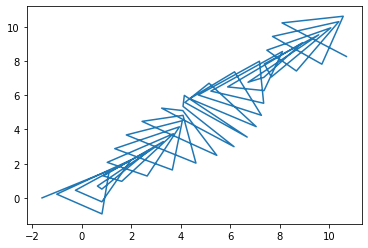

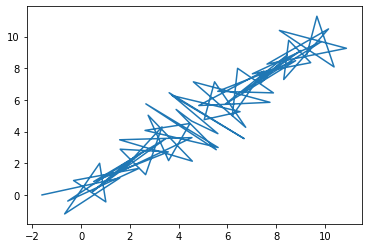

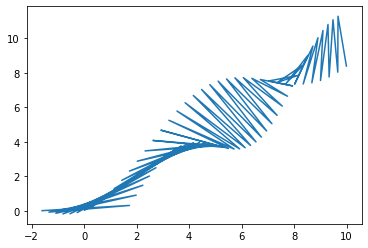

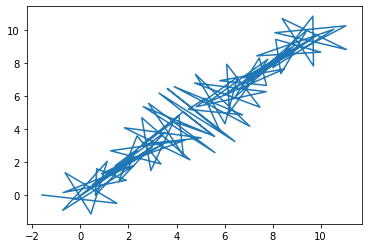

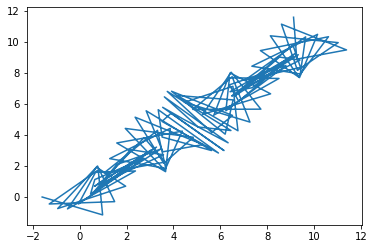

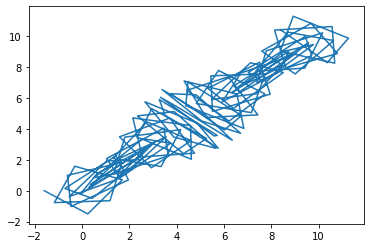

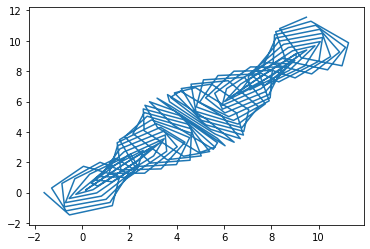

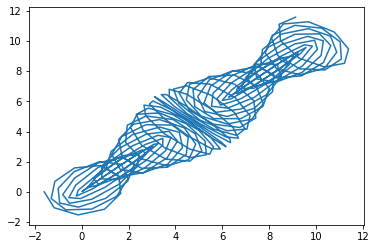

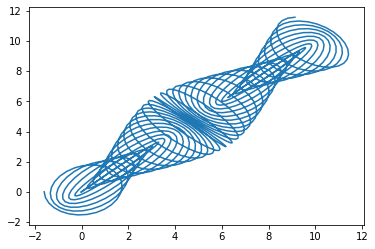

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def fx(t):
    return t - 1.6*np.cos(24*t)

def fy(t):
    return t-1.6*np.sin(25*t)

# Step Parameters for vector t
hi_b = 0.18
lo_b = 0.01
by = 0.02
step = np.arange(lo_b,hi_b, by)
step = np.flip(step, axis=0)

# Live-Plot inside the for-loop
for st in step:
    t = np.arange(0,10,st)
    x = fx(t)
    y = fy(t)
    plt.figure()
    plt.plot(x,y)
    plt.pause(0.4)
plt.show()
    

### Exercise 1 - Plots
Use the previous information and visualize your own live-plot using the following trigonometric equations:
$$x(u) = sin(33u)cos(9u)\\
y(u) = sin(40u)sin(7u)$$<br>
A correct final image, if everything was written correctly, is something like the following: <img src="plt.png">

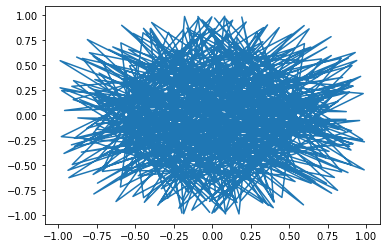

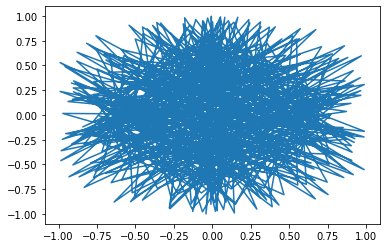

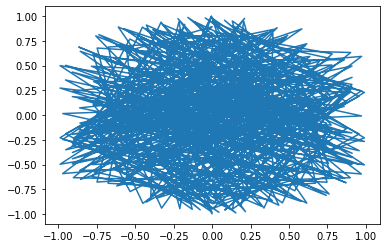

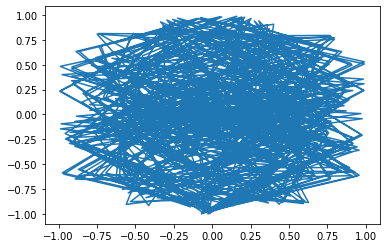

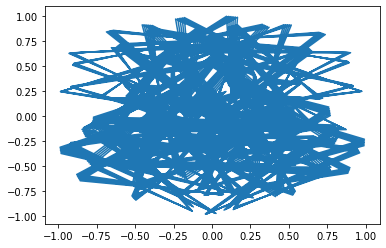

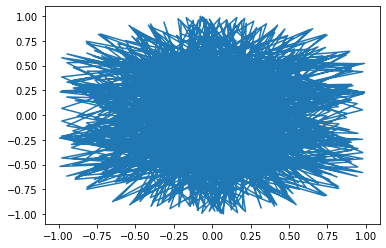

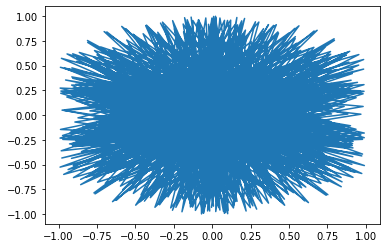

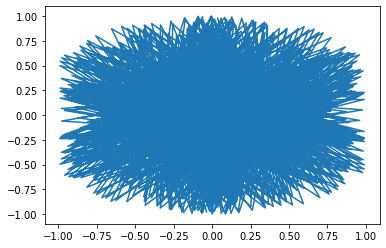

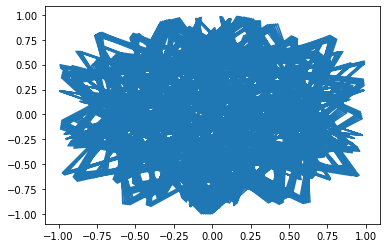

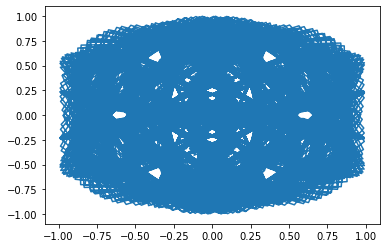

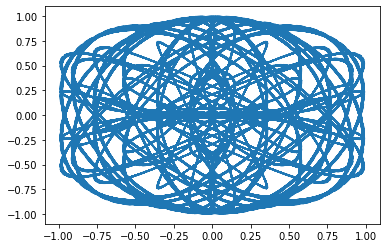

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Function for generating x(u)
# Code here:
def fx(t):
    return np.sin(33*t)*np.cos(9*t)

#Function for generating y(u)
def fy(t):
    return np.sin(40*t)*np.sin(7*t)

# Generate vector u

# Step Parameters for vector t
hi_b = 0.22
lo_b = 0.01
by = 0.02
step = np.arange(lo_b,hi_b, by)
step = np.flip(step)

# Live-Plot inside the for-loop
for st in step:
    t = np.arange(0,100,st)
    x = fx(t)
    y = fy(t)
    plt.figure()
    plt.plot(x,y)
    plt.pause(0.4)
plt.figure()
#
#
#

### Part II  Maps: OpenRoute Service and Folium 

#### Download APIs for Python
- #### Some basic API's: 
    - Install the `openrouteservice` [(documentation)](https://pypi.org/project/openrouteservice/) library. The current package provides a functional python-API for requesting geographical data directly from openrouteservice. You will have to create an account and get the API_KEY in order to be able to work with this library. You can find more information in the website [openrouteservice.org](https://openrouteservice.org/services/) where you can also create such an account, read the documentation and play around with online data request forms.

    - The second library is called `folium` and it provides API for map visualization. You can download it from [pypi.org/project/folium](https://pypi.org/project/folium/).

    - Please keep in mind that Anaconda users have to follow specific instructions for their anaconda-python-distribution for any package installation.

 - #### Using `openrouteservice`
     - Import the library, provide some coordinates and request the route. 
     - Try to understand the content of the routes dictionary 
     - Note that always we have to provide the api_key when we generate a client

In [ ]:
# !pip install openrouteservice 
import openrouteservice as opn
from openrouteservice.directions import directions
api_key='Put your api key here'
coords = ((8.34234,48.23424),(8.34423,48.26424))

client = opn.Client(key=api_key) # Specify your personal API key
routes = directions(client, coords) 
routes

{'bbox': [8.327707, 48.231946, 8.345244, 48.263552],
 'metadata': {'attribution': 'openrouteservice.org | OpenStreetMap contributors',
  'engine': {'build_date': '2020-08-18T08:46:24Z',
   'graph_date': '1970-01-01T00:00:00Z',
   'version': '6.2.1'},
  'query': {'coordinates': [[8.34234, 48.23424], [8.34423, 48.26424]],
   'format': 'json',
   'profile': 'driving-car'},
  'service': 'routing',
  'timestamp': 1598616879281},
 'routes': [{'bbox': [8.327707, 48.231946, 8.345244, 48.263552],
   'geometry': 'mtkeHuv|q@~@VLHz@\\PR|@hBt@j@^n@L\\NjALv@Jh@NXi@zBm@jCKTy@z@qAhBa@\\[Ne@DgCc@i@?[Ty@hAi@zASRaBRWHi@r@kAdCy@`Au@d@eA|@q@h@WRe@PYHYBqADgAAcAL_A^w@~@q@`@w@Zw@Cm@K[PeA|Aa@p@g@fAiAhBuAv@]VU^k@xAUXe@TqATy@V}@f@_@V[MUWqA_FKy@Me@_@cAu@{Ae@c@aAfBaAv@g@rBm@|@w@x@m@^U@m@Ma@SI\\mAlEkAjC_AjC_ApCe@z@i@j@q@f@WLwAr@u@T}A\\wATU?WCs@[oA]]EmACUCg@SMaAi@mDQm@K}@Oo@aAeBUSc@Ys@[WW_@q@e@a@cA_@w@E{BHmBXqBkBsA}@{Ao@iAB{@QYSi@qCUy@Ee@i@kBWk@yAoCWS_@SaAE{@yAu@mDUsAqA}@EM@QTiA|@iAn@gAd@eAg@_@I]??k@i@yBkEa@}@W}@WkC

- #### Decode a PolyLine
The output of the `.directions` object is a json file by default. We can decode it to a simple dictionary which, in this case, is a GeoJSON-ready. We can simply do the following:

In [ ]:
import openrouteservice as opn
from openrouteservice.directions import directions
from openrouteservice import convert

api_key='Put your api key here'
coords = ((8.34234,48.23424),(8.34423,48.26424))

client = opn.Client(key=api_key) # Specify your personal API key

# decode_polyline needs the geometry only
geometry = client.directions(coords)['routes'][0]['geometry']

decoded = convert.decode_polyline(geometry)

decoded # this has only the coordinates for the route.

{'coordinates': [[8.34427, 48.23383],
  [8.34415, 48.23351],
  [8.3441, 48.23344],
  [8.34395, 48.23314],
  [8.34385, 48.23305],
  [8.34332, 48.23274],
  [8.3431, 48.23247],
  [8.34286, 48.23231],
  [8.34271, 48.23224],
  [8.34233, 48.23216],
  [8.34205, 48.23209],
  [8.34184, 48.23203],
  [8.34171, 48.23195],
  [8.34109, 48.23216],
  [8.34039, 48.23239],
  [8.34028, 48.23245],
  [8.33998, 48.23274],
  [8.33945, 48.23315],
  [8.3393, 48.23332],
  [8.33922, 48.23346],
  [8.33919, 48.23365],
  [8.33937, 48.23433],
  [8.33937, 48.23454],
  [8.33926, 48.23468],
  [8.33889, 48.23497],
  [8.33843, 48.23518],
  [8.33833, 48.23528],
  [8.33823, 48.23577],
  [8.33818, 48.23589],
  [8.33792, 48.2361],
  [8.33725, 48.23648],
  [8.33692, 48.23677],
  [8.33673, 48.23704],
  [8.33642, 48.23739],
  [8.33621, 48.23764],
  [8.33611, 48.23776],
  [8.33602, 48.23795],
  [8.33597, 48.23808],
  [8.33595, 48.23821],
  [8.33592, 48.23862],
  [8.33593, 48.23898],
  [8.33586, 48.23932],
  [8.3357, 48.23964],
 

- #### Visualize the maps
    - Import `folium` library
    - Get familiar using the [link](https://python-visualization.github.io/folium/quickstart.html)
    - Try to plot a map using the the coordinates: 52.169709,4.457111 
    - Is the place on the map familiar to you?

In [1]:
import folium
# Set up folium map
map1 = folium.Map(location=([52.169709,4.457111]), zoom_start=17)
map1

- #### Visualize specific locations
    1. Plot the map around the previous location
    2. Specify University Buildings
    3. Request isochrones within some minutes walking from each building
    4. Draw the radius of isochrones (note the reversed coordinates)

In [2]:
import openrouteservice as opn
import folium

clnt = opn.Client(key= '5b3ce3597851110001cf624871534e9a8b664afba7c805c088868a69') # Specify your personal API key
# 1. Map
map1 = folium.Map(location=([52.169709,4.457111]), zoom_start=16)

# 2. Set up the building dictionary with real coordinates
bld_dict = {'Archeologie': {'location': [4.464366,52.165078]},
            'Gorlaeus': {'location': [ 4.459992, 52.167412]},
            'Jansen': {'location': [4.455754,52.167730]},
            'Chemistry': {'location': [4.459306,52.168101]}
           }

# 3. Request of isochrones with 2 minute footwalk.
params_iso = {'profile': 'cycling-road',
              'intervals': [120], # 120/60 = 2 mins
              'segments': 120,
              'attributes': ['total_pop'] # Get population count for isochrones
             }

# 4. Add the isochrones to the map and visualize it
for name, bld in bld_dict.items():
    params_iso['locations'] = [bld['location']] # Add buildings coords to request parameters
    bld['iso'] = clnt.isochrones(**params_iso) # Perform isochrone request
    folium.features.GeoJson(bld['iso']).add_to(map1) # Add GeoJson to map
    
    folium.map.Marker(list(reversed(bld['location'])), # reverse coords due to folium syntax:Latitude/Longitude of Map (Northing, Easting).
                      icon=folium.Icon(color='lightgray',
                                        icon_color='#cc0000',
                                        icon='home',
                                        prefix='fa',
                                       ),
                      popup=name,
                 ).add_to(map1) # Add apartment locations to map

map1

ModuleNotFoundError: No module named 'openrouteservice'

- #### Simulating trajectories of horseback riders
Near LIACS, on the Wassenaarseweg, there are stabels where children go for horseback riding. Here, we would like to simulate the daily rounds that the horses do. Such simulations can help when assessing how robust algorithms are to noise or how well they can extract subtrajectories. 
While there are other ways to get an object with timestamped longitudes and latitutes, we are presenting here a basic version. Feel free to increase the difficulty or add more cycles (i.e. additional daily or weekly trajectories) as you wish.

The only movement that the horses do is one round in the park, the rest of the time, they stay in the stables. There are two locations in the park where the children will take a break and have a snack for 30 min. 


In [26]:

import openrouteservice as opn
from openrouteservice.directions import directions
from openrouteservice import convert
import numpy as np


#A) coordinates of the stables and the two picnic sites:

coords_ridingschool    = [4.467626, 52.170207]

coords_corner_one      = [4.474798, 52.172679]

coords_corner_two      = [4.475071, 52.169961]


#B) get the circuit from open route services:

api_key='Put your api key here' #see Exercise above on how to get the trajectories
coords = (coords_ridingschool, coords_corner_one, coords_corner_two)

client = opn.Client(key=api_key) # Specify your personal API key

# decode_polyline needs the geometry only
geometry = client.directions(coords)['routes'][0]['geometry']

decodedCircuit = convert.decode_polyline(geometry)



#C)Creating an object with timestamped long/lat

# Say it takes 20 min (the children are very slow) to get from one fix point to the next: 
# Remember that the break times are 30 min long

#explicit code:
leg_one = (coords_ridingschool,coords_corner_one)
leg_two = (coords_corner_one, coords_corner_two)
leg_three = (coords_corner_two, coords_ridingschool)

geom_one = client.directions(leg_one)['routes'][0]['geometry']
leg_one_decoded = convert.decode_polyline(geom_one)

geom_two = client.directions(leg_two)['routes'][0]['geometry']
leg_two_decoded = convert.decode_polyline(geom_two)

geom_three = client.directions(leg_three)['routes'][0]['geometry']
leg_three_decoded = convert.decode_polyline(geom_three)

leg_three_decoded
#C)Creating an object with timestamped long/lat

# #get indices and filter evenly as many locations as we need to fit the timestamps:
indices_one = np.round(np.linspace(0,len(leg_one_decoded['coordinates']) , 19))
indices_two = np.round(np.linspace(0,len(leg_two_decoded['coordinates']) , 19))
indices_three = np.round(np.linspace(0,len(leg_three_decoded['coordinates']) , 19))


# ##extract long and lat from coordinates
x  = leg_one_decoded ['coordinates']
lon = [z[0] for z in x]
lat = [z[1] for z in x]

lon_first_leg = np.asarray(lon)[indices_one.astype(int)- 1]
lat_first_leg = np.asarray(lat)[indices_one.astype(int)- 1]

# #add rest time
# #long/ lat for first break
lon_rest_one = 4.474798
lat_rest_one =  52.170207
lon_first_break = np.repeat(lon_rest_one, 30)
lat_first_break = np.repeat(lat_rest_one, 30)
lon_first_break



# #create on vector with lat, one with long and the complete timestamps:

vec_long = np.append(lon_first_break, lon_first_leg )
vec_lat = np.append(lat_first_break, lat_first_leg )

timestamps_first_leg_plus_break = np.linspace(0,50,49)


#Stuff to work out yourself:
### do this for the rest of the legs and fuse into one object
### add hours of the day to the timestamps, decide yourself when the kids are starting their class

#D) Fill the rest of the day with "Staying at stables"

#E) Can you visualize the trajectory? (see answers below for help with folium)

#F) How would you add noise to the trajectory? What kind of noise could occur?



49

### Part III  Foursquare API and pandas dataframes

- ####  Foursquare API
Visit [foursquare](https://developer.foursquare.com/places-api) site and create a developer free account. Start an app and install [foursquare-python-API](https://pypi.org/project/foursquare/) by typing on a terminal: ``` pip install foursquare```, or download it from the site. 

The following block of code provides some information about how to use `foursquare-API` in python. All you need is to create a developer's account and connect it using the `client_id` and `client_secret` hash from your application in [foursquare](https://developer.foursquare.com/places-api). Then, you create a client object and use it for data request. Please have a look at the [foursquare-documentation](https://developer.foursquare.com/docs).<br>
The specific example requests all bars in specific radius from the Leiden center.

In [27]:
# !pip install foursquare
import foursquare as fsq

# Please copy paste your client_id and client_secret from your web foursquare-app
cl_id='TLE3F5Q4JLFJZKBXMDUGLRG5AVTDTYU1YIESEOXRVPYIPX23'
cl_sec='YLXYQ55ZBSQZAYBHD1LD5EUFCQODSSOQXHERYFPVBN0MTR24'

# Construct the client object
client = fsq.Foursquare(client_id=cl_id, client_secret=cl_sec)

# Make a request
## Request specificaly for venues near the center of Leiden  
### ll     --> latitude/longitude
### query  --> type of venue 
### intent --> intent performing search
### radius --> Limit results to venues within this
### limit  --> Number of results to return, up to 50
data = client.venues.search(params={'ll': '52.160236, 4.497012', 'query': 'bar', 
                                    'intent': 'browse', 'radius':300, 'limit':50})
print('Bars near my house: ' + str(len(data['venues'])))

Bars near my house: 3


#### Exercise 2 - Foursquare
#### a. Index the requested dictionary and convert it into a pandas DataFrame
1. Request from foursquare all possible venues within 3000 meters radius of the Leiden city center. Find the coordinates of Leiden Center from google-maps or any other map application.
2. Make a function which takes a dictionary as input.
2. Index the dictionary and get interesting information.
3. Make a DataFrame from that dictionary with the following information in columns: name, latitude, longitude, distance, address, genre (pluralName).
4. You noticed that in many cases some of the information is missing. Make sure that your DataFrame is loaded with the correct information from the dictionary where it was possible, anywhere else fill in with 'NA'. 
5. Return the dataframe.

In [30]:
import pandas as pd
import foursquare as fsq

# Please copy paste your client_id and client_secret from your web foursquare-app
cl_id='TLE3F5Q4JLFJZKBXMDUGLRG5AVTDTYU1YIESEOXRVPYIPX23'
cl_sec='YLXYQ55ZBSQZAYBHD1LD5EUFCQODSSOQXHERYFPVBN0MTR24'

# Construct the client object
client = fsq.Foursquare(client_id=cl_id, client_secret=cl_sec)

# Use your Client and request data from foursquare
data = client.venues.search(params={'ll': '52.159536, 4.491366', 'query': 'bar', 
                                    'intent': 'browse', 'radius':3000, 'limit':50})

# Build a function
def venue_scraper(data):
    print(len(data['venues']))
    d = {'name' : [], 'lat':[], 'lng': [], 'dist': [], 'address': [], 'genre': []}
    for i in range(len(data['venues'])):
        d['name'].append(data['venues'][i]['name'])
        d['lat'].append(data['venues'][i]['location']['lat'])
        d['lng'].append(data['venues'][i]['location']['lng'])
        d['dist'].append(data['venues'][i]['location']['distance'])
        if 'address' in data['venues'][i]['location'].keys():
            d['address'].append(data['venues'][i]['location']['address'])
        else:
            d['address'].append('NA')
        if data['venues'][i]['categories'] != []:
            d['genre'].append(data['venues'][i]['categories'][0]['pluralName'])
        else:
            d['genre'].append('NA')
    df = pd.DataFrame.from_dict(d)
    return d, df
        
di, df=venue_scraper(data)                                        
df        
        
  
    

50


,name,lat,lng,dist,address,genre
0,Cosmo Blow Dry Bar,52.159146,4.490836,56,Aalmarkt 22,Salons / Barbershops
1,Bar-Dancing De Kroon,52.163177,4.494783,467,Langegracht 65,Gay Bars
2,M Noodle Bar,52.162870,4.484963,573,Beestenmarkt 4,Noodle Houses
3,Rooftop Bar,52.164953,4.488021,644,NA,NA
4,Bar Bistro Raphael,52.159177,4.491167,42,Nieuwe Rijn 1,Bars
5,Bar Lokaal,52.157281,4.494333,322,NA,Bars
6,Takkie Apres ski Bar,52.159441,4.491379,10,NA,NA
7,Hudson Bar & Kitchen,52.163390,4.486174,556,Nieuwe Beestenmarkt 15-21,American Restaurants
8,Ocean Bar (Holiday Inn),52.163967,4.456371,2440,NA,Hotel Bars
9,Vi-kings Bar,52.160225,4.483472,544,Noordeinde 28,Sports Bars


#### b. Count the frequencies of the different venue types (genres)
Search in [pandas-documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) and try to answer the following:
1. Count the frequencies of each venue-type.
2. Count the number of NA values.
3. Find the nearest venue in the center of Leiden.
4. Find the most distant venue from the center.

In [ ]:
# Count frequencies
x= df.groupby(['genre']).size()
print('Frequencies of Venue-Types\n\n' + str(x))

# Find NA and count their frequencies
NA_count = x['NA']
print('\nFrquency of NA: ' + str(NA_count))

# Nearest venue
near_venue=df.loc[df['dist']==min(df['dist']), ['name']].iloc[0]['name']
# Distant venue
far_venue=df.loc[df['dist']==max(df['dist']), ['name']].iloc[0]['name']

print('\nClosest Venue: ' + str(near_venue) + '\nDistant Venue: ' + str(far_venue))

Frequencies of Venue-Types

genre
American Restaurants                            1
Art Galleries                                   1
Bars                                           14
Beer Gardens                                    1
Business Services                               1
Cafés                                           1
Castles                                         1
Coffee Shops                                    1
Construction & Landscaping                      1
Delis / Bodegas                                 1
Doctor's Offices                                1
Dutch Restaurants                               1
Fraternity Houses                               1
Gay Bars                                        1
Gyms                                            1
Hotel Bars                                      2
Hotels                                          1
Italian Restaurants                             2
NA                                              3
Nightclubs      

#### c. Visualize Frequencies 
Plot a barplot for venue-types (genre), using pandas and matplotlib, only for frequencies which are:
$\text{genre}\geq2$. Barplots are suitable graphs for frequencies visualization but this is not the only way. Find another proper way to visualize those frequencies.


In [29]:
x= df.groupby(['genre']).size()

# Query the dataframe for values bigger or equal than 2
x= x[x>=2]

# Plot bar
plt.figure()
x.plot(kind='bar',title='Venue-Type')
plt.show()

# Plot pie
plt.figure()
x.plot(kind='pie', title='Venue-Type')
plt.show()




NameError: name 'df' is not defined

#### d. Visualize locations in maps
Use all previous information and draw pins for all venues in the center of leiden.<br>
Open a map using folium and initialize it with Leiden center coordinates: 52.159536, 4.491366.<br> Then, plot all the venues from the dataframe.

In [31]:
import folium
# Make a list with the coordinates of each location
locations = df[['lat', 'lng']]
locationlist = locations.values.tolist()

# Open a map and initialize it with the coordinates
map2 = folium.Map(location=[52.159536, 4.491366], zoom_start=15)
# add to the map all different locations
# use the parameter 'popup=' to include the name of each venue
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df['name'][point]).add_to(map2)
map2

## Part IV Troubleshooting poor Pandas (and Numpy) performance

### Profiling and Optimizing Loops

As a data scientist you're going to work with large, large amounts of data. Numpy, Pandas and Matplotlib are fully capable of doing a lot of work for you. However, how you use them is important as well. If your code takes a lot of time to run, then it's hard to work on it, run tests, improve it, and do interesting experiments. This section of the lab focuses on finding the problem spots and speeding them up.

You might think that doing heavy lifting in a Jupyter Notebook seems a bit strange, because usually the more GUI the more performance you sacrifice. However, the cell-based setup of these notebooks actually makes it very easy to zoom in on parts of your program and evaluate their performance, using Jupyter's magic commands. We're going to be using two specific commands a lot: timeit and lprun. To use lprun we may first need to install and load it; timeit is already built in.


In [34]:
# Install lprun
!pip install line_profiler

This section of the tutorial is inspired largely by a [talk](https://www.youtube.com/watch?v=HN5d490_KKk) given at PyCon '17 by Sofia Heisler. You will need a dataset which (if it wasn't bundled with this lab) can be downloaded [here](https://github.com/s-heisler/pycon2017-optimizing-pandas/blob/master/pyCon%20materials/new_york_hotels.csv).

In [1]:
# Load our tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the line profiler extension (lprun)
%load_ext line_profiler

In [2]:
# Load and peek at the dataset
df = pd.read_csv('new_york_hotels.csv', encoding='cp1252')
df.head()

,ean_hotel_id,name,address1,city,state_province,postal_code,latitude,longitude,star_rating,high_rate,low_rate
0,269955,Hilton Garden Inn Albany/SUNY Area,1389 Washington Ave,Albany,NY,12206,42.68751,-73.81643,3.0,154.0272,124.0216
1,113431,Courtyard by Marriott Albany Thruway,1455 Washington Avenue,Albany,NY,12206,42.68971,-73.82021,3.0,179.0100,134.0000
2,108151,Radisson Hotel Albany,205 Wolf Rd,Albany,NY,12205,42.72410,-73.79822,3.0,134.1700,84.1600
3,254756,Hilton Garden Inn Albany Medical Center,62 New Scotland Ave,Albany,NY,12208,42.65157,-73.77638,3.0,308.2807,228.4597
4,198232,CrestHill Suites SUNY University Albany,1415 Washington Avenue,Albany,NY,12206,42.68873,-73.81854,3.0,169.3900,89.3900


We're going to be comparing these hotels by measuring their [great circle distance](https://en.wikipedia.org/wiki/Great-circle_distance) to a constant location using the [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula). Our constant location will be a shop called [Brooklyn Superhero Supply Co.](https://www.superherosupplies.com/) which is located at (40.671, -73.985).

In [3]:
# Define a basic Haversine distance formula
def haversine(lat1, lon1, lat2, lon2):
    MILES = 3959
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    total_miles = MILES * c
    return total_miles

Let's say that we started out with just a simple loop to collect the distances of all these hotels to the shop;

In [4]:
# Define a function to manually loop over all rows and return a series of distances
def haversine_looping(df):
    distance_list = []
    for i in range(0, len(df)):
        d = haversine(40.671, -73.985, df.iloc[i]['latitude'], df.iloc[i]['longitude'])
        distance_list.append(d)
    return distance_list

However, our program seems to be taking a long time and we want to figure out if this function is causing the problem. We can check how much time this function takes with the `timeit` magic command. Magic commands are a feature of Jupyter Notebook that you use by putting either a single % in front of them (to apply them to one line) or a double %% to apply them to the whole code cell. So, let's see how long our code is taking:

In [5]:
# Run the haversine looping function
%timeit df['distance'] = haversine_looping(df)

579 ms ± 24.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Is that slow? Well, this is only a very modest dataset (1631 rows), so yeah, actually that's slow. If we were only this dataset to trial our code before deploying it for a bigger problem, then we'd run into trouble. Maybe we can go faster using Pandas' built-in method to iterate over every row, called `iterrows`?

In [6]:
%%timeit

# Haversine applied on rows via iteration
haversine_series = []
for index, row in df.iterrows():
    haversine_series.append(haversine(40.671, -73.985, row['latitude'], row['longitude']))
df['distance'] = haversine_series

194 ms ± 5.95 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


That looks about 2.5x as fast, and we didn't have to do anything really complicated. Actually, this code looks a bit nicer. Clearly, how you iterate over a Pandas dataframe matters.

Can we do even better? Yes. There are actually quite a few different methods available, ranging from quick easy fixes to more advanced ones for really heavy lifting. In the next part of this lab we'll show several approaches, but leave it to you to examine which work best.

#### Using `apply` and `lambda` to apply a function to each row
Pandas has another built-in function to apply a function to a part of the dataframe, called `apply`. Apply should be called with an `axis` argument to indicate along which axis to apply the operation. Since we want to apply it to rows, we use `axis=1`.


(The fact that the rows are axis 1, not axis 0, points to an interesting thing: Pandas is in [column major order](https://en.wikipedia.org/wiki/Row-_and_column-major_order), which implies that *any* row-wise traversal is basically going against the grain.) 

In [7]:
%%timeit
df['distance'] = df.apply(lambda row: haversine(40.671, -73.985, row['latitude'], row['longitude']), axis=1)

48.7 ms ± 1.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


You'll also notice the word `lambda` here. Lamda creates an anonymous function for 'row' that basically wraps our haversine function. We could have also written something like:

In [8]:
%%timeit
def wrap_haversine(row):
    return haversine(40.671, -73.985, row['latitude'], row['longitude'])

df['distance'] = df.apply(wrap_haversine, axis=1)

50.1 ms ± 2.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Notice that we're writing our function `wrap_haversine(row)` as `wrap_haversine`, so without any argument; that's because what we're actually doing is handing over the `apply_haversine` function itself to Pandas `apply` to apply to each row. 

Why did we even need this `wrap_haversine` function? Because our `haversine` function itself takes four arguments, but we only have one argument (the whole row). So, using `lambda` here is just a bit more convenient than defining a wrapper function.

#### Extracting the columns and looping over them
We could extract the columns and loop over them; maybe that's more efficient than going against the grain of Pandas' column-major ordering?

In [9]:
%%timeit
lat = df['latitude']
lon = df['longitude']
distance_list = []
for i in range(len(lon)):
    distance_list.append(haversine(40.671, -73.985, lat[i], lon[i]))

40.8 ms ± 690 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


We haven't changed much from the original naive code - we simplified the lookup of the rows, now we're just using lat[i] to get the latitude instead of df.iloc[i]['latitude'], and likewise for the longitude. We paid for that with some overhead in extracting the whole column from pandas, but was it worth it?

#### Getting our data column-row instead of row-column
Building on the previous idea, maybe we'd rather not pull out those columns, but what if we just used the same looping idea, looking up columns first and then the row inside the column?

In [10]:
%%timeit
distance_list = []
for i in range(len(df)):
    distance_list.append(haversine(40.671, -73.985, df['latitude'][i], df['longitude'][i]))

52.1 ms ± 2.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### Using the columns as raw Numpy arrays
Pandas is built on Numpy, and you can extract a column as a Numpy array quite easily:

In [11]:
lon = df['longitude'].values
print(type(lon))

<class 'numpy.ndarray'>


Can we use this to loop faster over it?

In [12]:
%%timeit
lat = df['latitude'].values
lon = df['longitude'].values
distance_list = []
for i in range(len(lon)):
    distance_list.append(haversine(40.671, -73.985, lat[i], lon[i]))

25.8 ms ± 286 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Why should we expect looping over Numpy arrays to be faster than over a column from a Pandas array (a Pandas Series), or a classic Python list, for that matter?

Pandas Series are built on Numpy arrays, but with some more indexing and other fancy features built in. Extracting the raw Numpy array just skips some of the overhead that comes with that. The difference with Python lists is much more profound. A Python list is allowed to contain any kind of object - floating point numbers, integers, strings, sub-lists, sets, dictionaries, class instances, whole classes, functions, and packages. Clearly, those different kinds of things don't all need the same kind of memory, so they can't be stored in a neat row of equal-size chunks in memory. When you decide to referce item 10 of a list, Python has to look up where item 10 is stored. Meanwhile, a Numpy array is strictly homogenous in its data type - it's all float64, or all integer32 and so forth. Each cell in the array is the same size, so if you know where the array starts, you can easily calculate where each value is. (There is more to it, but this is the key point: Numpy arrays are homogenously typed and that enables optimization tricks.)

### EXERCISE: which other ways work best?
Use `%timeit` with the new methods described above and figure out which ones work best. Which ones look easiest to work with?

---

We added `%%timeit` to the code cells of the section above and ran them to get the following results:

* apply using lambda: 68.9ms
* apply using a wrapper function: 68.8ms
* extracting the columns and looping over them: 66.2ms
* looping column-row instead of row-column: 77.4ms
* extracting the columns as numpy arrays and looping over them: 26.7ms

Given that the numpy columns aren't any harder to work with, we have a clear winner here.


#### Vectorized operations
A phrase you'll run into when you dig into Numpy, or if you're familiar with MATLAB, is vectorizing operations. Basically, it means applying an operation across an entire vector of elements all at once, rather than using a loop to process each element separately. Instead of an explicit loop, we use optimized C code built into Numpy that can apply operations to a whole vector all at once.

To see this in action, we're going to use the second magic command we prepared: `lprun`.

In [19]:
# Haversine applied on rows with line profiler
%lprun -f haversine df.apply(lambda row: haversine(40.671, -73.985, row["latitude"], row["longitude"]), axis=1)

This opens a popup window showing how many times each line in our haversine function has been hit, and how much time has been spend there. We see that we're hitting each line 1631 times, because we're calling the function for each of the 1631 rows in our dataframe. That's clearly some overhead we might be able to get rid of.

Because Pandas Series columns are Numpy arrays under the hood, and because our haversine function uses suitable operations, we're able to easily vectorize our function. All we have to do is call the function with columns as arguments instead of individual values from a row:

In [18]:
# Vectorized implementation of Haversine applied on Pandas series
%lprun -f haversine df["distance"] = haversine(40.671, -73.985, df["latitude"], df["longitude"])

Looking at the profiling of this version, we now see that we're hitting each line in the function only once. Is it faster?

In [ ]:
%timeit df['distance'] = haversine(40.671, -73.985, df['latitude'], df['longitude'])

Yeah, that's quite a speedup. Of course, the trick we did before, using the raw Numpy values under the Pandas Series, we can combine that:

In [ ]:
%timeit df['distance'] = haversine(40.671, -73.985, df['latitude'].values, df['longitude'].values)

That's even faster. At this point, we should have mostly solved our performance problems, if you can vectorize your operations this neatly, working with Pandas shouldn't be slow at all.

So *if* you can vectorize your functions. What does it take to vectorize a function? Basically, you have to build it using only components that Numpy can apply to a whole vector at a time. For example, the `np.sqrt(x)` function can take the square roots of all the values in a vector all at once.

Vectorizing mathematical operations like addition, subtraction, multiplication, division and so forth is generally straightforward; you might not even realize it but when you write `my_array + my_other_array`, you're using Numpy's addition code which can add two arrays together. For classic linear algebra tasks it's generally a bit more obvious because those transformations have been built as Numpy functions.

A good introductory tutorial is [Look Ma, No For-Loops: Array Programming With NumPy](https://realpython.com/numpy-array-programming/), and a somewhat more advanced tutorial is [“Vectorized” Operations: Optimized Computations on NumPy Arrays](https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html).

You'll see that vectorization often requires some creative rethinking of your problem, often coming at it sideways. It isn't always necessary to use vectorization, because sometimes the performance hit from a not-too-naive loop is acceptable and rebuilding your function to be vectorized takes too much work. However, if you run into serious performance problems, vectorization can be the answer. 

### Exercise: vectorizing your operations
We start with two vectors of random numbers:

In [ ]:
a = np.random.random(10**7)
b = np.random.random(10**7)

Now we're computing the dot product, that is, the sum of multiplying the elements along the two vectors. This has been coded as follows:

In [ ]:
%%timeit

dot_product = 0
for i in range(len(a)):
    dot_product += a[i] * b[i]

**YOUR TASK** vectorize this code and compare the difference in speed.

In [ ]:
%%timeit
dot_product = np.dot(a, b)

That's about 400x faster, and our code also looks nicer!

#### Pushing the envelope: optimizing your function line by line
If you've already done vectorization, and performance is still not satisfactory, you can also use the line profiler to look at the lines of your code and see where the most time is spent. For example:

In [ ]:
# Vectorized implementation of Haversine applied on Pandas series
%lprun -f haversine df['distance'] = haversine(40.671, -73.985, df['latitude'].values, df['longitude'].values)

We see that most time is spent in the line `a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2`. If we wanted to try more optimization, that would be were we should focus our efforts.

Doing so is beyond the scope of this tutorial, but it doesn't actually require you to start writing C code. You could use Cython or Numexpr to speed things up, as shown in this tutorial: [Enhancing performance](https://pandas.pydata.org/pandas-docs/stable/user_guide/enhancingperf.html).

### Matplotlib tips and tricks
Consider the code and plot below:

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

# generate some dummy data
x = np.linspace(-10, 10, 41)  # 41 equally spaced points in [-10, 10]
y = x**2

# plot the data
ax.plot(x, y, label='label for my line', color='red')

# make the plot look good
ax.set_title('my title')
ax.set_xlabel('my x label')
ax.set_ylabel('my y label')
ax.legend()                              # display the legend; matplotlib tries to put it somewhere convenient
ax.set_xticks(np.linspace(-10, 10, 21))  # set the ticks along the x-axis
ax.set_yscale('log')                     # display the y dimension in a log scale
ax.grid()                                # turn on the gridlines

# save plots before showing, otherwise you get empty pictures
fig.savefig('A.png')
fig.savefig('B.jpg')
fig.savefig('C.svg')
fig.savefig('D.pdf')
fig.savefig('E.eps')
fig.savefig('F')

# now show it
plt.show()

Consider these questions:

* What is the default file format that Matplotlib saves in?
* Which file format looks good if you enlarge it?
* Which file format leaves text as text? This is handy if people want to use copy-paste, or a screen reader for people with disabilities.



#### Axes and Figures

You'll also notice that this plot uses a lot of calls on the `ax` object and a few on `fig`, but not a lot of calls to `plt`. In a lot of tutorials you'll see most of the same code, but all calls made to `plt`. Why is that?

Basically, Matplotlib got started as a port of MATLAB plotting capabilities to Python. `plt` is basically a placeholder that points to the most recent figure you were working on. That's fine as long as you're only working on one plot in a project, but it can become confusing if you're generating a lot of pictures.

What we do when we call `fig, ax = plt.subplots()` is generate a new *Figure* with in this case one *Axes* object. The Axes object is what we think of as the actual plot: it has an X and Y axis (hence the name, axes, plural of axis), and it's where we're drawing on. The Figure is more like the windowframe around it. We can have a Figure with multiple Axes in it, which is what happens if you call [plt.subplots](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html) with arguments to indicate how many you'd like; then instead of a single Axes object, you get a bunch of them.  For a more extensive tutorial of "best practices" Matplotlib, I recommend [Python Plotting With Matplotlib (Guide)](https://realpython.com/python-matplotlib-guide/) and [Effectively Using Matplotlib](https://pbpython.com/effective-matplotlib.html).

### Exercise: a larger scale experiment
This is the last task in this lab. Try to think about how you'd set this up if you had to run variants of these experiments many, many times, and you didn't want to have to do everything by hand every time. 

You've already compared a number of optimization techniques, but you've only compared them on one dataset of a specific size. But the method that looks good on this dataset might not scale well to bigger datasets (maybe it's not linear..), so we want to test these methods on multiple sizes of datasets.

**YOUR TASK**
* Choose four different ways of using the haversine function.
* Apply them to this dataset, but scaled up to 2x, 5x, 10, 20x, 50x and 100x the original size.
* Plot the results with Matplotlib. Experiment with the way you set up the plot to get a picture that is useful for analyzing your results.
* Try to find out if the runtime  of any of the methods doesn't linearly scale with the size of the dataset. Does it scale better (i.e. less fast) or worse?

You can enlarge a dataset by just duplicating the rows:

In [32]:
print('original', df.shape[0], 'rows')

extra = 5
df2 = df.append([df]*extra,ignore_index=True)  # append rows

print('new', df2.shape[0], 'rows')

original 50 rows
new 300 rows


You can also extract the information we collect by `%timeit` so that you can use it for plotting:

In [60]:
res = %timeit -o df['distance'] = df.apply(lambda row: haversine(40.671, -73.985, row['latitude'], row['longitude']), axis=1)
runtime = np.mean(res.all_runs)  # measured in seconds
print('mean runtime (s):', runtime)

47.4 ms ± 2.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
mean runtime (s): 0.4739721857143065


**solution**

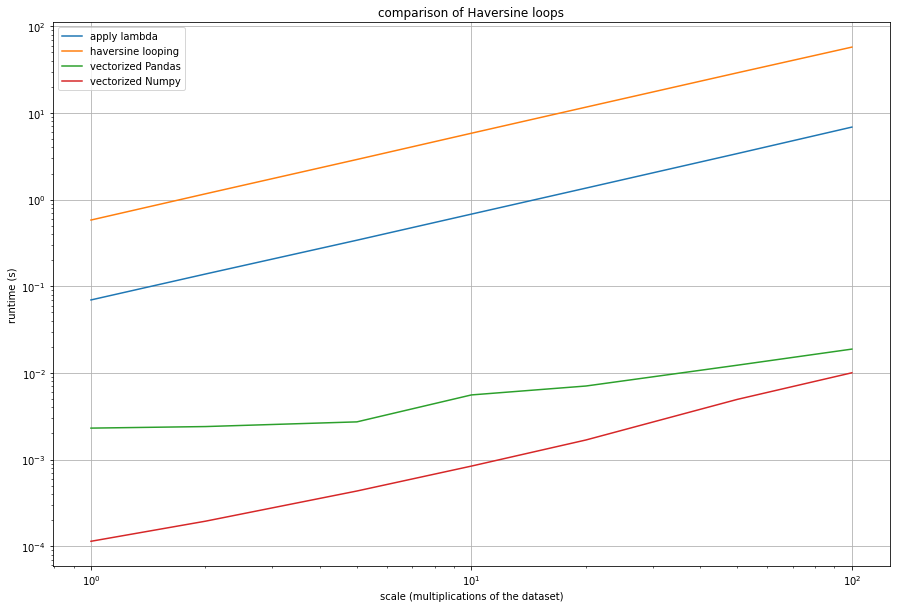

In [ ]:
# Prepare to collect your data
results = {}
scales = [1, 2, 5, 10, 20, 50, 100]
frames = []
for scale in scales:
  df2 = df.append([df]*(scale-1),ignore_index=True)  # generate a bigger dataframe
  frames.append(df2)

# Collect data for each different implementation

temp = []
for i in range(len(scales)):
  res = %timeit -o haversine_looping(frames[i])
  temp.append(res.best)
results['haversine looping'] = temp

temp = []
for i in range(len(scales)):
  res = %timeit -o frames[i].apply(lambda row: haversine(40.671, -73.985, row['latitude'], row['longitude']), axis=1)
  temp.append(res.best)
results['apply lambda'] = temp

temp = []
for i in range(len(scales)):
  res = %timeit -o haversine(40.671, -73.985, frames[i]['latitude'], frames[i]['longitude'])
  temp.append(res.best)
results['vectorized Pandas'] = temp

temp = []
for i in range(len(scales)):
  res = %timeit -o haversine(40.671, -73.985, frames[i]['latitude'].values, frames[i]['longitude'].values)
  temp.append(res.best)
results['vectorized Numpy'] = temp

# Create a plot for the results

fig, ax = plt.subplots(figsize=(15,10))

# plot the data
for result in results:
  ax.plot(scales, results[result], label=result)

# make the plot look good
ax.set_title('comparison of Haversine loops')
ax.set_xlabel('scale (multiplications of the dataset)')
ax.set_ylabel('runtime (s)')
ax.legend()                              # display the legend; matplotlib tries to put it somewhere convenient
# ax.set_xticks(np.linspace(-10, 10, 21))  # set the ticks along the x-axis
ax.set_xscale('log')                     # display the x dimension in a log scale
ax.set_yscale('log')                     # display the y dimension in a log scale
ax.grid()                                # turn on the gridlines

# save plots before showing, otherwise you get empty pictures
fig.savefig('Haversine comparison.svg')
fig.savefig('Haversine comparison.pdf')

# now show it
plt.show()

It seems as if Pandas is closing in on Numpy for vectorized efficiency. It probably won't duck under it, but it seems that on large scale operations the overhead cost of Pandas becomes relatively smaller compared to the base cost of the computation on the data.

### Reflection
Consider the following questions:
* What steps can you take to ensure your functions can be vectorized?
* If your function is too hard to vectorize, how can you best loop over your dataframe?
* How can you track down performance bottlenecks in your code?

### References

#### Numpy & Pandas
* [Cloud X Lab - introduction to Numpy and Pandas](https://cloudxlab.com/blog/numpy-pandas-introduction/)
* [Zero With Dot - Performance of numpy and pandas - comparison](https://zerowithdot.com/python-numpy-and-pandas-performance/)
* [Sofia Heisler - A Beginner’s Guide to Optimizing Pandas Code for Speed](https://engineering.upside.com/a-beginners-guide-to-optimizing-pandas-code-for-speed-c09ef2c6a4d6) basic optimization techniques, see also her PyCon 2017 talk on [YouTube](https://www.youtube.com/watch?v=HN5d490_KKk).
* [Pandas - Enhancing Performance](https://pandas.pydata.org/pandas-docs/stable/user_guide/enhancingperf.html) deeper enhancement techniques
* [Numexpr](https://github.com/pydata/numexpr) easily speed up more complex numpy operations
* [Real Python - Look Ma, No For-Loops: Array Programming With NumPy](https://realpython.com/numpy-array-programming/) a somewhat easier introduction to vectorization
* [Python Like You Mean It - Vectorized Operations](https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html) a bit more advanced text about vectorization

#### Matplotlib
* [Real Python - Python Plotting With Matplotlib (Guide)](https://realpython.com/python-matplotlib-guide/)
* [Practical Business Python - Effectively Using Matplotlib](https://pbpython.com/effective-matplotlib.html)